In [29]:
#Importing necessary python libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# connect to SQlite NHANES DB and read in necessary data.
con = sqlite3.connect("../data/NHANES SQLite DBs/2013-2014 NHANES Survey.db")
query = """

SELECT

SEQN, RIDAGEYR, RIAGENDR, BMXHT, BMXWT, BMXBMI, RIDRETH1, BPXDI1, 
BPXDI2, BPXDI3, BPXDI4, BPXSY1, BPXSY2, BPXSY3, BPXSY4, BPXCHR,
BPXPLS, BPXPULS, LBDHDD, LBDLDL, LBXTC, LBXTR, LBXSGL,
MCQ300a, PAD680, SMQ040,SMQ020, DIQ010, MCQ160e, MCQ160c

FROM demographic
JOIN examination
    USING(SEQN)
JOIN labs
    USING(SEQN)
JOIN questionnaire
    USING(SEQN)
;
"""
heart_df = df = pd.read_sql(query, con)

#Close SQLite DB connections
con.close()

#View DataFrame
heart_df.head()

,SEQN,RIDAGEYR,RIAGENDR,BMXHT,BMXWT,BMXBMI,RIDRETH1,BPXDI1,BPXDI2,BPXDI3,...,LBXTC,LBXTR,LBXSGL,MCQ300A,PAD680,SMQ040,SMQ020,DIQ010,MCQ160E,MCQ160C
0,73557,69,1,171.3,78.3,26.7,4,72,76,74,...,167,None,554,2,600,3,1,1,2,2
1,73558,54,1,176.8,89.5,28.6,3,62,80,42,...,170,None,219,2,540,2,1,1,2,2
2,73559,72,1,175.3,88.9,28.9,3,90,76,80,...,126,51,183,1,300,3,1,1,2,2
3,73560,9,1,137.3,32.2,17.1,3,38,34,38,...,168,None,None,None,None,None,None,2,None,None
4,73561,73,2,162.4,52.0,19.7,3,86,88,86,...,201,75,104,1,480,None,2,2,2,2


In [31]:
# rename columns
col_rename ={
'RIDAGEYR': 'Age', 'RIAGENDR': 'Gender', 'BMXHT': 'HT', 'BMXWT': 'WT', 'BMXBMI': 'BMI','RIDRETH1': 'Race', 
'BPXDI1': 'DBP_1', 'BPXDI2': 'DBP_2', 'BPXDI3': 'DBP_3', 'BPXDI4': 'DBP_4', 'BPXSY1': 'SBP_1', 'BPXSY2': 'SBP_2', 
'BPXSY3': 'SBP_3', 'BPXSY4': 'SBP_4', 'BPXCHR': 'HR', 'BPXPLS': 'Pulse', 'BPXPULS': 'Arrhythmia', 'LBDHDD': 'HDL', 
'LBDLDL': 'LDL', 'LBXTC': 'TC', 'LBXTR': 'TG', 'LBXSGL': 'Glu', 'MCQ300A': 'FH_MI', 'PAD680': 'DTS',
'SMQ040': 'Smoker', 'SMQ020': 'Smoked_100','DIQ010': 'DM', 'MCQ160E': 'MI', 'MCQ160C': 'CAD'
}
heart_df.rename(columns=col_rename, inplace=True)
heart_df.head()

,SEQN,Age,Gender,HT,WT,BMI,Race,DBP_1,DBP_2,DBP_3,...,TC,TG,Glu,FH_MI,DTS,Smoker,Smoked_100,DM,MI,CAD
0,73557,69,1,171.3,78.3,26.7,4,72,76,74,...,167,None,554,2,600,3,1,1,2,2
1,73558,54,1,176.8,89.5,28.6,3,62,80,42,...,170,None,219,2,540,2,1,1,2,2
2,73559,72,1,175.3,88.9,28.9,3,90,76,80,...,126,51,183,1,300,3,1,1,2,2
3,73560,9,1,137.3,32.2,17.1,3,38,34,38,...,168,None,None,None,None,None,None,2,None,None
4,73561,73,2,162.4,52.0,19.7,3,86,88,86,...,201,75,104,1,480,None,2,2,2,2


In [32]:
#Replace none with NaN for easier manipulation
heart_df.fillna(value=np.nan, inplace=True)

#Convert to floats to allow for arithmetic with NaNs
heart_df = heart_df.astype(float)
heart_df.head()

,SEQN,Age,Gender,HT,WT,BMI,Race,DBP_1,DBP_2,DBP_3,...,TC,TG,Glu,FH_MI,DTS,Smoker,Smoked_100,DM,MI,CAD
0,73557.0,69.0,1.0,171.3,78.3,26.7,4.0,72.0,76.0,74.0,...,167.0,NaN,554.0,2.0,600.0,3.0,1.0,1.0,2.0,2.0
1,73558.0,54.0,1.0,176.8,89.5,28.6,3.0,62.0,80.0,42.0,...,170.0,NaN,219.0,2.0,540.0,2.0,1.0,1.0,2.0,2.0
2,73559.0,72.0,1.0,175.3,88.9,28.9,3.0,90.0,76.0,80.0,...,126.0,51.0,183.0,1.0,300.0,3.0,1.0,1.0,2.0,2.0
3,73560.0,9.0,1.0,137.3,32.2,17.1,3.0,38.0,34.0,38.0,...,168.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,73561.0,73.0,2.0,162.4,52.0,19.7,3.0,86.0,88.0,86.0,...,201.0,75.0,104.0,1.0,480.0,NaN,2.0,2.0,2.0,2.0


In [33]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQN        9813 non-null   float64
 1   Age         9813 non-null   float64
 2   Gender      9813 non-null   float64
 3   HT          9067 non-null   float64
 4   WT          9723 non-null   float64
 5   BMI         9055 non-null   float64
 6   Race        9813 non-null   float64
 7   DBP_1       7172 non-null   float64
 8   DBP_2       7409 non-null   float64
 9   DBP_3       7408 non-null   float64
 10  DBP_4       515 non-null    float64
 11  SBP_1       7172 non-null   float64
 12  SBP_2       7409 non-null   float64
 13  SBP_3       7408 non-null   float64
 14  SBP_4       515 non-null    float64
 15  HR          1961 non-null   float64
 16  Pulse       7549 non-null   float64
 17  Arrhythmia  9511 non-null   float64
 18  HDL         7624 non-null   float64
 19  LDL         3105 non-null  

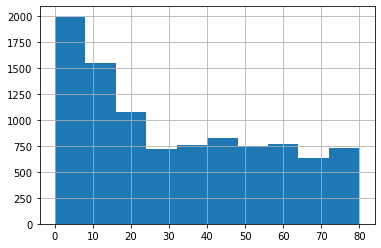

In [34]:
#Checking Age Distribution
heart_df.Age.hist();

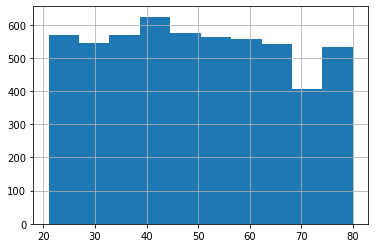

In [35]:
# Keeping adults ages 21 and over. 
heart_df = heart_df[(heart_df.Age >= 21)]
heart_df.Age.hist();

In [36]:
#Obtaining average blood pressure
avg_sys_bp = heart_df[['SBP_1', 'SBP_2', 'SBP_3', 'SBP_4']].mean(axis=1).round(0)
avg_dia_bp = heart_df[['DBP_1', 'DBP_2', 'DBP_3', 'DBP_4']].mean(axis=1).round(0)

# #Combining pulse and heart rate into one column 
# pulse = heart_df[['HR', 'Pulse']].mean(axis=1).round(0)

#Obtaining column with just the non-HDL cholesterol
non_hdl = heart_df['TC'] - heart_df['HDL']

#Dropping unnecesary columns
heart_df.drop(columns=['SBP_1', 'SBP_2', 'SBP_3', 'SBP_4', 'DBP_1', 'DBP_2', 'DBP_3', 
                       'DBP_4', 'HR', 'TC', 'TG', 'HDL', 'LDL', 'HT', 'WT', 'SEQN'], inplace=True)

#Inserting new columns at specified locations
heart_df.insert(7, 'SBP', avg_sys_bp)
heart_df.insert(8, 'DBP', avg_dia_bp)
heart_df.insert(12, 'Non_HDL', non_hdl)

heart_df.head()

,Age,Gender,BMI,Race,Pulse,Arrhythmia,Glu,SBP,DBP,FH_MI,DTS,Smoker,Non_HDL,Smoked_100,DM,MI,CAD
0,69.0,1.0,26.7,4.0,86.0,1.0,554.0,113.0,74.0,2.0,600.0,3.0,102.0,1.0,1.0,2.0,2.0
1,54.0,1.0,28.6,3.0,74.0,1.0,219.0,157.0,61.0,2.0,540.0,2.0,120.0,1.0,1.0,2.0,2.0
2,72.0,1.0,28.9,3.0,68.0,1.0,183.0,142.0,82.0,1.0,300.0,3.0,66.0,1.0,1.0,2.0,2.0
4,73.0,2.0,19.7,3.0,92.0,1.0,104.0,137.0,87.0,1.0,480.0,NaN,116.0,2.0,2.0,2.0,2.0
5,56.0,1.0,41.7,1.0,60.0,1.0,104.0,157.0,82.0,2.0,360.0,3.0,188.0,1.0,2.0,1.0,1.0


In [37]:
#Changing CAD code 2.0 "Has not been diagnosed with CAD" to 0.0.
heart_df.CAD.mask((heart_df.CAD == 2.0), 0.0, inplace=True)

#Changing MI code 2.0 "Has not had a heart attack" to 0.0.
heart_df.MI.mask((heart_df.MI == 2.0), 0.0, inplace=True)

#Changing DM code 2.0 "Has not been diagnosed with Diabetes Mellitus" to 0.0.
heart_df.DM.mask((heart_df.DM == 2.0), 0.0, inplace=True)

#Changing DM code 1.0 "Has been diagnosed with Diabetes Mellitus" to 2.0.
heart_df.DM.mask((heart_df.DM == 1.0), 2.0, inplace=True)

#Changing DM code 3.0 "Borderline Diabetic" to 1.0.
heart_df.DM.mask((heart_df.DM == 3.0), 1.0, inplace=True)

# #Changing DM code 2.0 "Has not been diagnosed with Diabetes Mellitus" to 0.0.
# heart_df.DM.mask((heart_df.DM == 2.0), 0.0, inplace=True)

# #Changing DM code 1.0 "Has been diagnosed with Diabetes Mellitus" to 1.0.
# heart_df.DM.mask((heart_df.DM == 1.0), 1.0, inplace=True)

# #Changing DM code 3.0 "Borderline Diabetic" to 0.0.
# heart_df.DM.mask((heart_df.DM == 3.0), 0.0, inplace=True)


#Changing Arrhythmia code 1.0 "Regular Heartbeat" to 0.0.
heart_df.Arrhythmia.mask((heart_df.Arrhythmia == 1.0), 0.0, inplace=True)

#Changing Arrhythmia code 2.0 "Irregular Heartbeat" to 1.0.
heart_df.Arrhythmia.mask((heart_df.Arrhythmia == 2.0), 1.0, inplace=True)

#Changing Gender code 2.0 "Female" to 0.0.
heart_df.Gender.mask((heart_df.Gender == 2.0), 0.0, inplace=True)

#Changing FH_MI code 2.0 " No close relatives had a heart attack" to 0.0.
heart_df.FH_MI.mask((heart_df.FH_MI == 2.0), 0.0, inplace=True)

#Combining codes 1.0 and 2.0 from the "Smoker" column which are "Smokes Everyday" and "Smokes Some Days" to "Smoker" code of 1.0
heart_df.Smoker.mask((heart_df['Smoker']== 2.0), 1.0, inplace=True)

#Changing code 3.0 "Smokes Not At All" to "Non-Smoker" code of 0.0
heart_df.Smoker.mask((heart_df['Smoker']== 3.0), 0.0, inplace=True)

In [38]:
# imputing "Non-Smoker" (code 0.0) for null values in the "Smoker" column by using the "Smoked_100" column 
# for individuals who reported smoking less than 100 cigarettes in there lifetime.
heart_df.Smoker.mask((heart_df['Smoker'].isna()) & (heart_df['Smoked_100'] == 2.0), 0.0, inplace=True, axis=0)

#Dropping "Smoked_100" column
heart_df.drop(columns=['Smoked_100'], inplace=True)

heart_df.head()

,Age,Gender,BMI,Race,Pulse,Arrhythmia,Glu,SBP,DBP,FH_MI,DTS,Smoker,Non_HDL,DM,MI,CAD
0,69.0,1.0,26.7,4.0,86.0,0.0,554.0,113.0,74.0,0.0,600.0,0.0,102.0,2.0,0.0,0.0
1,54.0,1.0,28.6,3.0,74.0,0.0,219.0,157.0,61.0,0.0,540.0,1.0,120.0,2.0,0.0,0.0
2,72.0,1.0,28.9,3.0,68.0,0.0,183.0,142.0,82.0,1.0,300.0,0.0,66.0,2.0,0.0,0.0
4,73.0,0.0,19.7,3.0,92.0,0.0,104.0,137.0,87.0,1.0,480.0,0.0,116.0,0.0,0.0,0.0
5,56.0,1.0,41.7,1.0,60.0,0.0,104.0,157.0,82.0,0.0,360.0,0.0,188.0,0.0,1.0,1.0


In [39]:
# Droping all columns with code 9.0:"Not Sure"
index9 = heart_df[(heart_df.DM == 9.0) | (heart_df.MI == 9.0) | (heart_df.CAD == 9.0) | (heart_df.FH_MI == 9.0)].index

heart_df.drop(index9, inplace=True)

heart_df = heart_df.dropna()
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4874 entries, 0 to 9810
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         4874 non-null   float64
 1   Gender      4874 non-null   float64
 2   BMI         4874 non-null   float64
 3   Race        4874 non-null   float64
 4   Pulse       4874 non-null   float64
 5   Arrhythmia  4874 non-null   float64
 6   Glu         4874 non-null   float64
 7   SBP         4874 non-null   float64
 8   DBP         4874 non-null   float64
 9   FH_MI       4874 non-null   float64
 10  DTS         4874 non-null   float64
 11  Smoker      4874 non-null   float64
 12  Non_HDL     4874 non-null   float64
 13  DM          4874 non-null   float64
 14  MI          4874 non-null   float64
 15  CAD         4874 non-null   float64
dtypes: float64(16)
memory usage: 647.3 KB


In [40]:
# Gender and Disease Presence
male_CAD_count = len(heart_df[(heart_df.CAD == 1.0) & (heart_df.Gender == 1.0)])
male_noCAD_count = len(heart_df[(heart_df.CAD == 0.0) & (heart_df.Gender == 1.0)])
female_CAD_count =  len(heart_df[(heart_df.CAD == 1.0) & (heart_df.Gender == 0.0)])
female_noCAD_count = len(heart_df[(heart_df.CAD == 0.0) & (heart_df.Gender == 0.0)])

In [41]:
CAD_list = [male_CAD_count, male_noCAD_count, female_CAD_count, female_noCAD_count]
labels = ['Men with CAD', 'Men without CAD', 'Women with CAD', 'Women without CAD']

In [51]:
CAD_totals = heart_df.CAD.value_counts()
CAD_totals

195

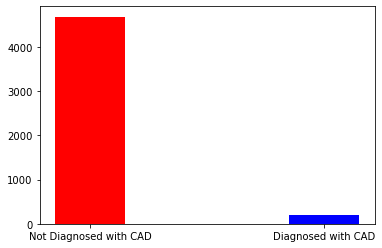

In [63]:
plt.bar(['Not Diagnosed with CAD', 'Diagnosed with CAD'], CAD_totals, color=['red','blue'], width=0.3);

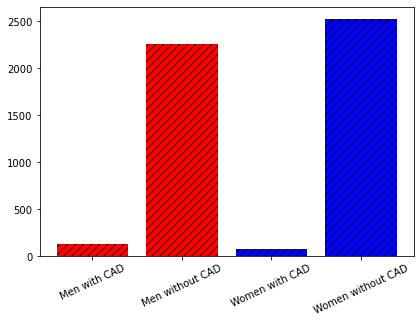

In [65]:
plt.bar(labels, CAD_list, color=['red', 'red', 'blue', 'blue'], hatch='///')
plt.tight_layout()
plt.xticks(rotation= 25)

plt.show()
